# BIKE SHARING ASSIGNMENT
By Irshad Ahamed (ML-C67)

## Steps to approach the bike sharing assignment

- Importing necessary libraries
- Loading the data set
- Data understanding and cleaning
- Exploratory Data Analysis
- Data pre-processing (dummy creations)
- Train-Test split
- Feature scaling
- Training the model
- Feature Selection (Recursive Feature Elimination) and manual elimination method
- Model finalization
- Residual analysis
- Model Prediction
- Model Evaluation

#### IMPORTING NECCESSARY LIBRARIES

In [1]:
# for data analysis and numerical functions
import numpy as np
import pandas as pd

#for visualization
import seaborn as sns
import matplotlib.pyplot as plt

#suppress warnings
import warnings
warnings.filterwarnings("ignore")

#train-test split
import sklearn
from sklearn.model_selection import train_test_split

#Feature scaling
from sklearn.preprocessing import StandardScaler

# Feature selection
from sklearn.feature_selection import RFE

#model building
from sklearn.linear_model import LinearRegression

#stats model to apply linear model based on the selected cost funtions
import statsmodels.api as sm

#To find the variance inflation factor to remove the multicollinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#to find r2 score for model evaluation
from sklearn.metrics import r2_score

#### LOADING THE DATASET

In [2]:
df_bike = pd.read_csv("day.csv")
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### DATA UNDERSTANDING AND CLEANING

In [3]:
df_bike.shape

(730, 16)

In [4]:
#checking for missing values
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#sanity check on missign values
df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

***From the above findings, there is no missing values present in the table***

The columns season and weather sit are represented by numbers 1,2,3 and 4. It is not implying the order among the categories. Hence, rationalizing it to categorical strings to avoid misinterpretations.

In [6]:
df_bike[['season','weathersit']]

,season,weathersit
0,1,2
1,1,2
2,1,1
3,1,1
4,1,1
...,...,...
725,1,2
726,1,2
727,1,2
728,1,1


In [7]:
df_bike[['season','weathersit']].nunique()

season        4
weathersit    3
dtype: int64

In [8]:
df_bike[['weathersit']].value_counts()

weathersit
1             463
2             246
3              21
Name: count, dtype: int64

From the above findings, season has 4 values and weather sit has 3 values. Let's look into the data dictionary what it shows.

season: 
- 1:spring
- 2:summer
- 3:fall
- 4:winter

weathersit: (summarizing)
- 1 : Clear
- 2 : Mist
- 3 : Light Snow
- 4 : Heavy rain
og


In [9]:
#mapping the categorical strings to the dataframe
df_bike['season'] = df_bike['season'].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
df_bike['weathersit'] = df_bike['weathersit'].map({1:"Clear", 2:"Mist", 3:"LightSnow", 4: "HeavyRain"})

In [10]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
df_bike['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [12]:
df_bike.describe()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,6.526027,0.028767,2.997260,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,3.450215,0.167266,2.006161,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,1.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Removing unwanted variables and redundant variables

- `instant` - It only act as identifiers and doesn't provide any meaningful information. It is replica of index. Hence removing that column
- `dteday` - Since we have year, month, holiday, weekday and workingday as separate column. Having the 'dteday' column may be redundant and brings complexity to the model. Hence decided to drop that column
- `Casual` and `registered` - The `cnt` variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable. Therefore, this 2 column may bring multicollinearity and it will be having dependency with target variable. Hence removing both the columns.

In [13]:
#removing unwanted variables
df_bike.drop(columns=['instant'], inplace=True)
df_bike.drop(columns=['dteday'], inplace=True)
df_bike.drop(columns=['casual'], inplace=True)
df_bike.drop(columns=['registered'], inplace=True)

In [14]:
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### EXPLORATORY DATA ANALYSIS

In [15]:
#Segmenting numerical and categorical variable
num_cols = ['temp','atemp','hum','windspeed','cnt']
cat_col = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

#### UNIVARIATE ANALYSIS

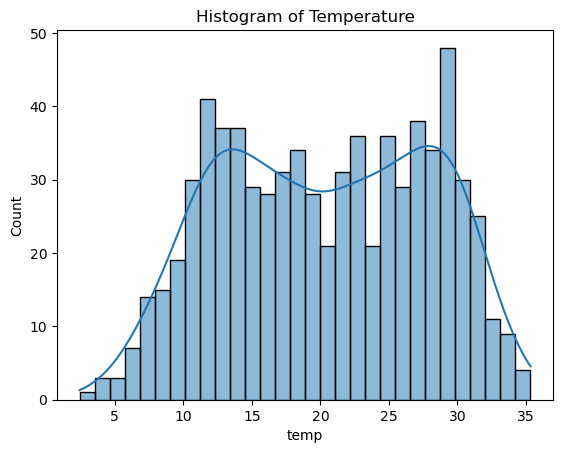

In [16]:
#temperature analysis
sns.histplot(df_bike['temp'],bins=30, kde=True)
plt.title("Histogram of Temperature")
plt.show()

`OBSERVATION`: The plot suggesting that the temperature data concentrated at 30 degrees with slight tendancy towards lower temperature. Even around 12 degrees, we could see the concentration. Both extreme low and extreme high temperature, the concentration is less in the dataset

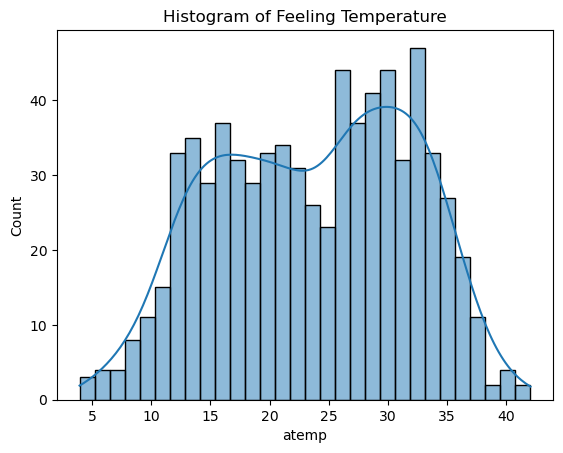

In [17]:
#univariate analysis on feeling temperature
sns.histplot(df_bike['atemp'],bins=30, kde=True)
plt.title("Histogram of Feeling Temperature")
plt.show()

`OBSERVATION`: This plot is very similar to above temperature plot with slight variance. It is better to find the correlation between those.

In [18]:
df_bike[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991696
atemp,0.991696,1.000000


Based on the correlation matrix we could see that, atemp is highly correlated with temp which can bring multicollinearity when building the model. Hence it is good to remove the atemp variable.

In [19]:
#dropping the atemp variable
df_bike.drop(columns=['atemp'], inplace=True)
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,43.6957,12.522300,1600


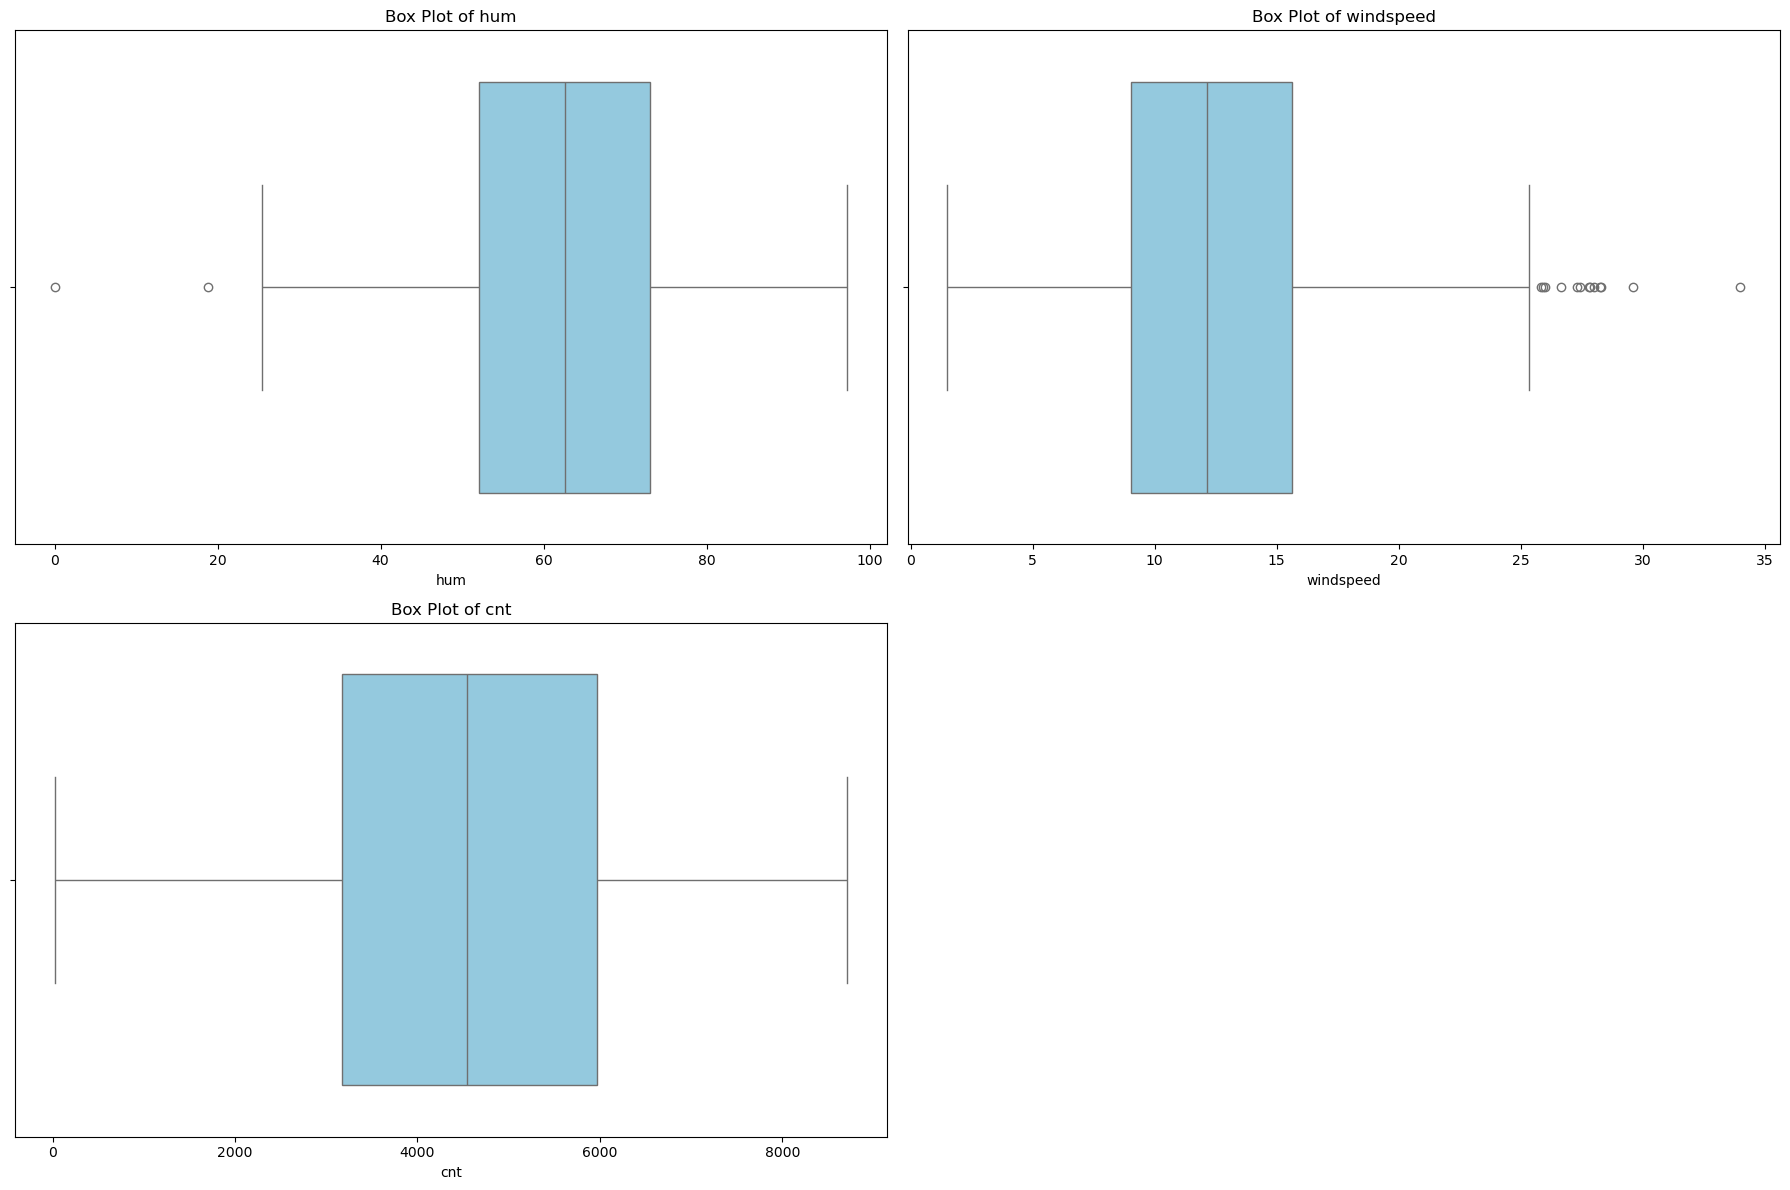

In [20]:
# Check for outliers using boxplots for various numerical columns to check outliers. (Boxplot in subplot)
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.boxplot(x=df_bike['hum'], color='skyblue')
plt.title('Box Plot of hum')

plt.subplot(2, 2, 2)
sns.boxplot(x=df_bike['windspeed'], color='skyblue')
plt.title('Box Plot of windspeed')

plt.subplot(2, 2, 3)
sns.boxplot(x=df_bike['cnt'], color='skyblue')
plt.title('Box Plot of cnt')

# Adjusting layout
plt.tight_layout()
plt.show()

`OBSERVATION`

`Humidity` - The distribution is fairly symmetrical with no significant outliers. The median is around 60-63 <br>
`windspeed` - The data has few high outliers and median is between 10 and 15. <br>
`cnt` - The data is widely spready with high range of values and no significant outliers


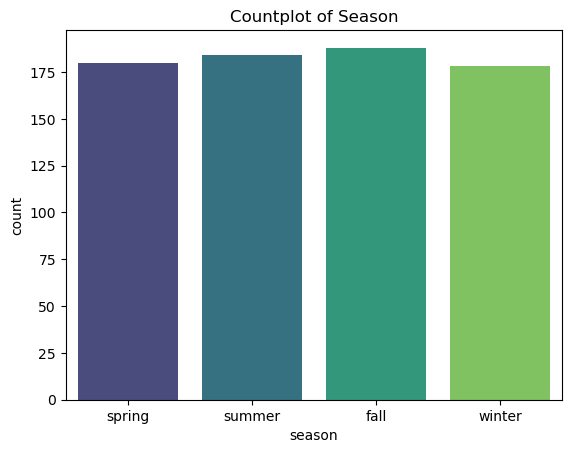

In [21]:
#univariate analysis on the season
sns.countplot(x = df_bike['season'], palette = 'viridis')
plt.title("Countplot of Season")
plt.show()

`OBSERVATION`: There is no major difference between each season. But fall season marks the higher frequency followed by summer, and spring. Winter marks the lower among all. 

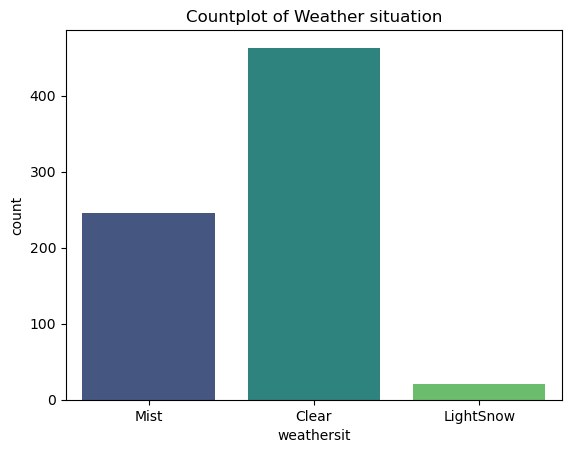

In [22]:
#univariate analysis on the weather situation
sns.countplot(x = df_bike['weathersit'], palette = 'viridis')
plt.title("Countplot of Weather situation")
plt.show()

`OBSERVATION`: When the weather is clear, the people are tend to rent the bikes more often. During Mist, the rent is reduced around 50% when compared to the clear weather. During LightSnow, bike rent is drastically reduced marking very low sales.

**Therefore, weather condition plays the major role in the bike rental sale and season has very minimal impact**

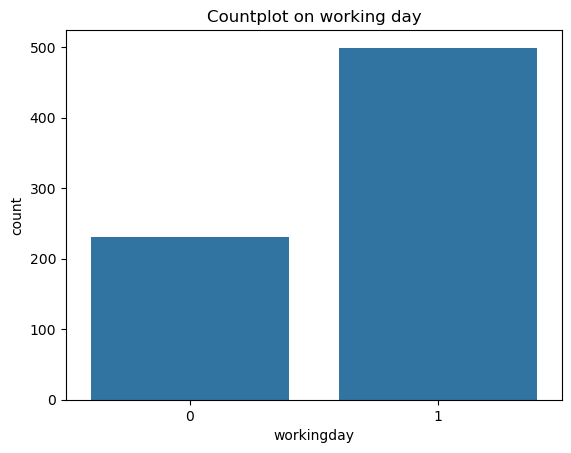

In [23]:
#univariate analysis on working day
sns.countplot(x= df_bike['workingday'])
plt.title("Countplot on working day")
plt.show()

`OBSERVATION`: People tend to rent the bikes during working day rather than holiday. It may be due to office commutation

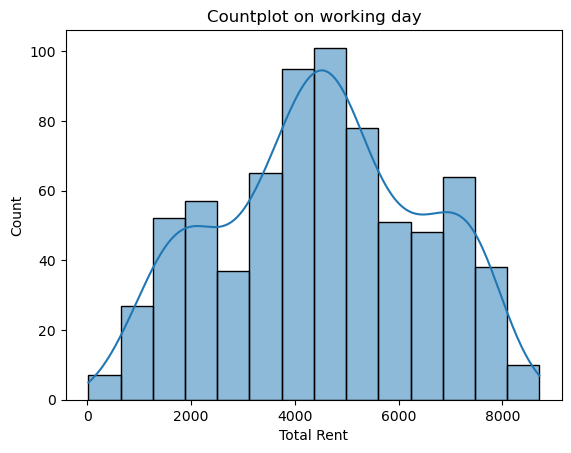

In [24]:
#univariate analysis on total rent
sns.histplot(x= df_bike['cnt'], kde=True)
plt.title("Countplot on working day")
plt.xlabel("Total Rent")
plt.show()

`OBSERVATION`: Total bike rents is concentrated around 4000 - 5000. There are fewer occurrences of very high and very low rents.

### BI VARIATE ANALYSIS

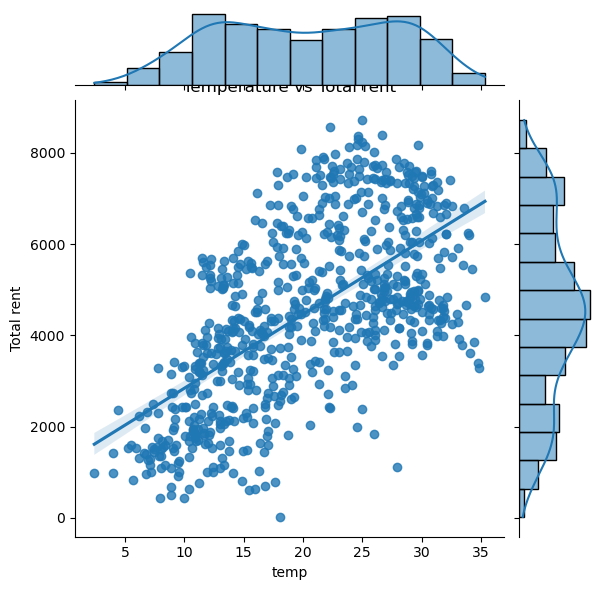

In [25]:
# Bivariate analysis between temperature and total rent

sns.jointplot(x = df_bike['temp'],y = df_bike['cnt'], kind='reg')
plt.title('Temperature vs Total rent')
plt.ylabel('Total rent')
plt.xlabel('temp') 
plt.show()

`OBSERVATION`: It looks like there is positive linear relationship between temperature and total bike rents. As the temperature increases, the total rent is also increasing. The relationship is not perfectly linear, but the general trend is upward sloping.

<Figure size 800x600 with 0 Axes>

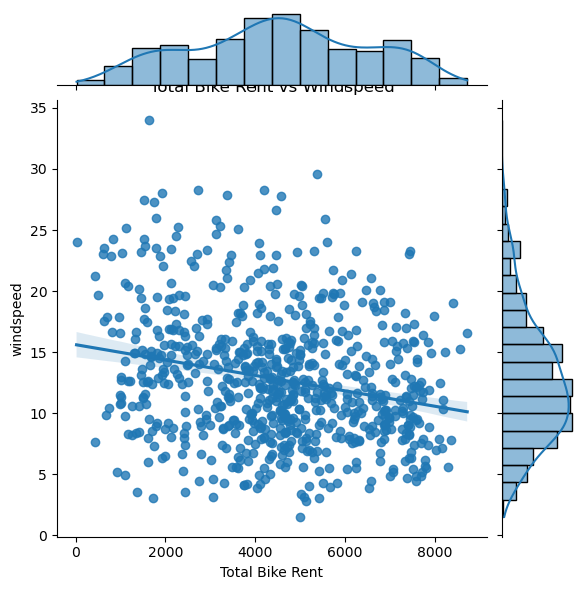

In [26]:
# Bivariate analysis between total bike rent and wind speed

plt.figure(figsize=(8, 6))
sns.jointplot(x='cnt', y='windspeed', data=df_bike, kind='reg')
plt.title('Total Bike Rent vs Windspeed')
plt.xlabel('Total Bike Rent')
plt.ylabel('windspeed')
plt.show()

`OBSERVATION` - There is heavy concentration of total rents when the windspeed is lower (7-16). If the windspeed is increasing, the total rent is tend to decrease. The negative slope indicating that windspeed and total rent is inversely proportional.

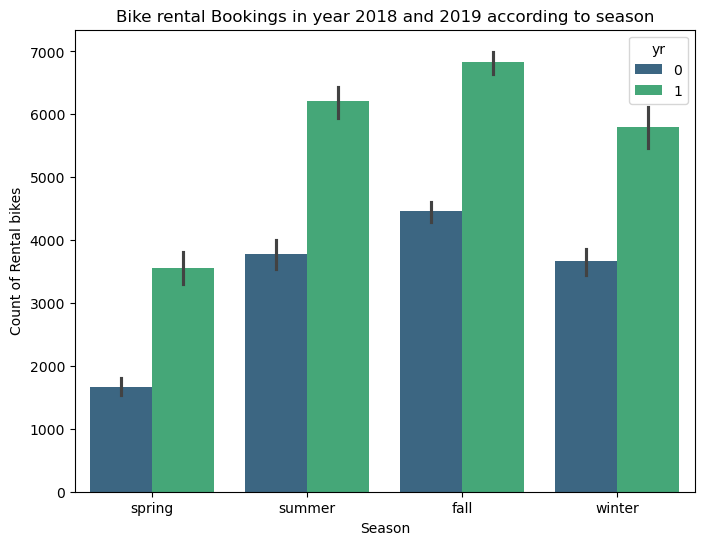

In [27]:
#bivariate analysis on Total rent with season in the year

plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='cnt',hue='yr', data=df_bike, palette='viridis')
plt.title('Bike rental Bookings in year 2018 and 2019 according to season')
plt.xlabel('Season')
plt.ylabel('Count of Rental bikes')
plt.show()

`OBSERVATION`: Compared to 2018, 2019 has increased in bike rental bookings in all seasons.

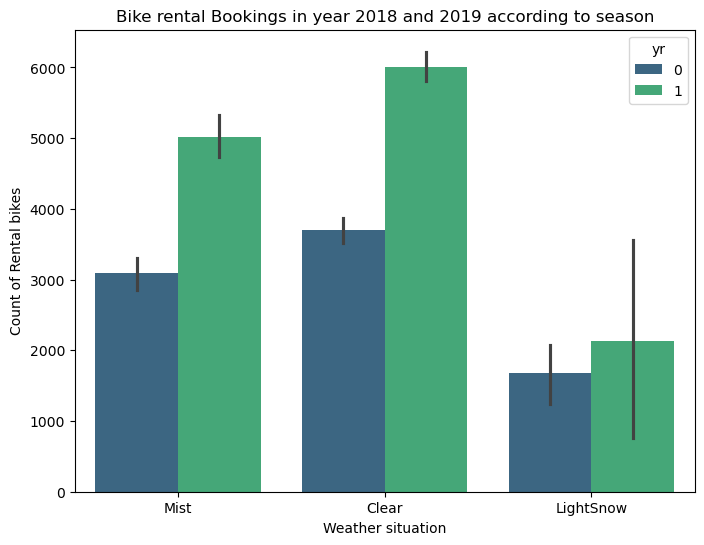

In [28]:
#bivariate analysis on Total rent with weather situation

plt.figure(figsize=(8, 6))
sns.barplot(x='weathersit', y='cnt',hue='yr', data=df_bike, palette='viridis')
plt.title('Bike rental Bookings in year 2018 and 2019 according to season')
plt.xlabel('Weather situation')
plt.ylabel('Count of Rental bikes')
plt.show()

`OBSERVATION`: Compared to 2018, 2019 has increased in bike rental bookings in all weather conditions. However, total rent is depending on the weather conditions. High marking of total sales in clear weather followed by mist. LightSnow marks the very less total rent.

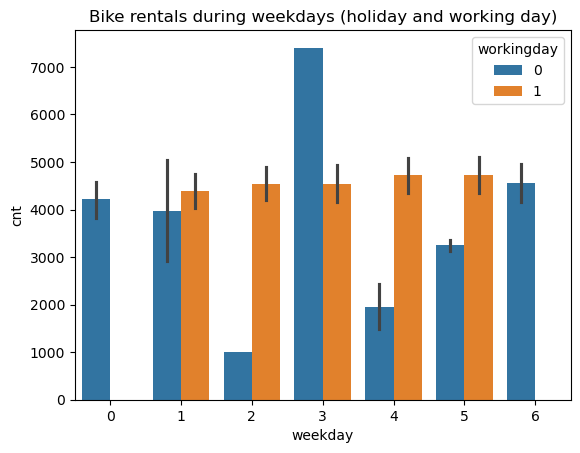

In [29]:
#bivariate analysis on total rent and weekdays along with Working day

sns.barplot(x=df_bike['weekday'],y=df_bike['cnt'],hue=df_bike['workingday'])
plt.title('Bike rentals during weekdays (holiday and working day)')
plt.show()

`OBSERVATION`
- People tend to rent bikes more frequently on working days, possibly for commuting or leisure activities.
- The number of bike rentals varies across different weekdays, with some days having significantly higher rentals than others. It may be due to weather conditions

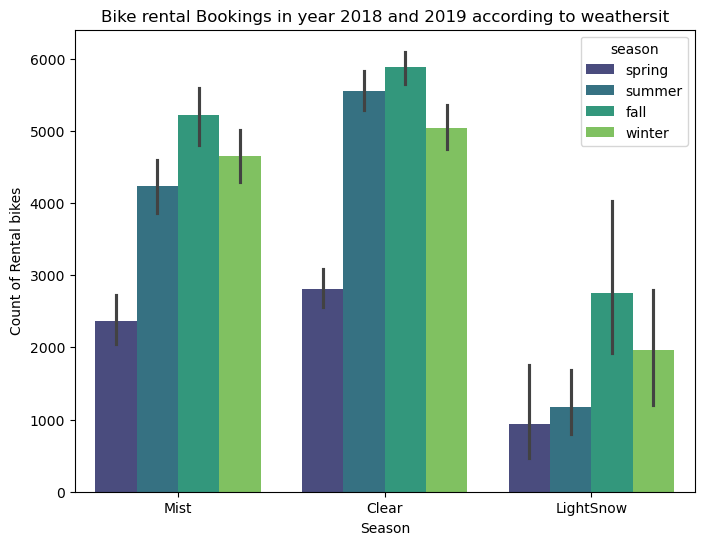

In [30]:
#bivariate analysis on total rent with season

plt.figure(figsize=(8, 6))
sns.barplot(x='weathersit', y='cnt',hue='season', data=df_bike, palette='viridis')
plt.title('Bike rental Bookings in year 2018 and 2019 according to weathersit')
plt.xlabel('Season')
plt.ylabel('Count of Rental bikes')
plt.show()

`OBSERVATIONS`

- Clear weather is the most popular: Bike rentals are consistently higher in clear weather compared to mist and light snow.
- Spring and Summer are peak seasons: Rentals are generally higher during spring and summer, regardless of the weather conditions.
- Winter sees the lowest rentals: Bike rentals are significantly lower in winter, especially in areas with light snow

OVERALL: The weather conditions play a significant role in bike rental patterns, with clear weather and warmer temperatures being the most favorable for rentals.

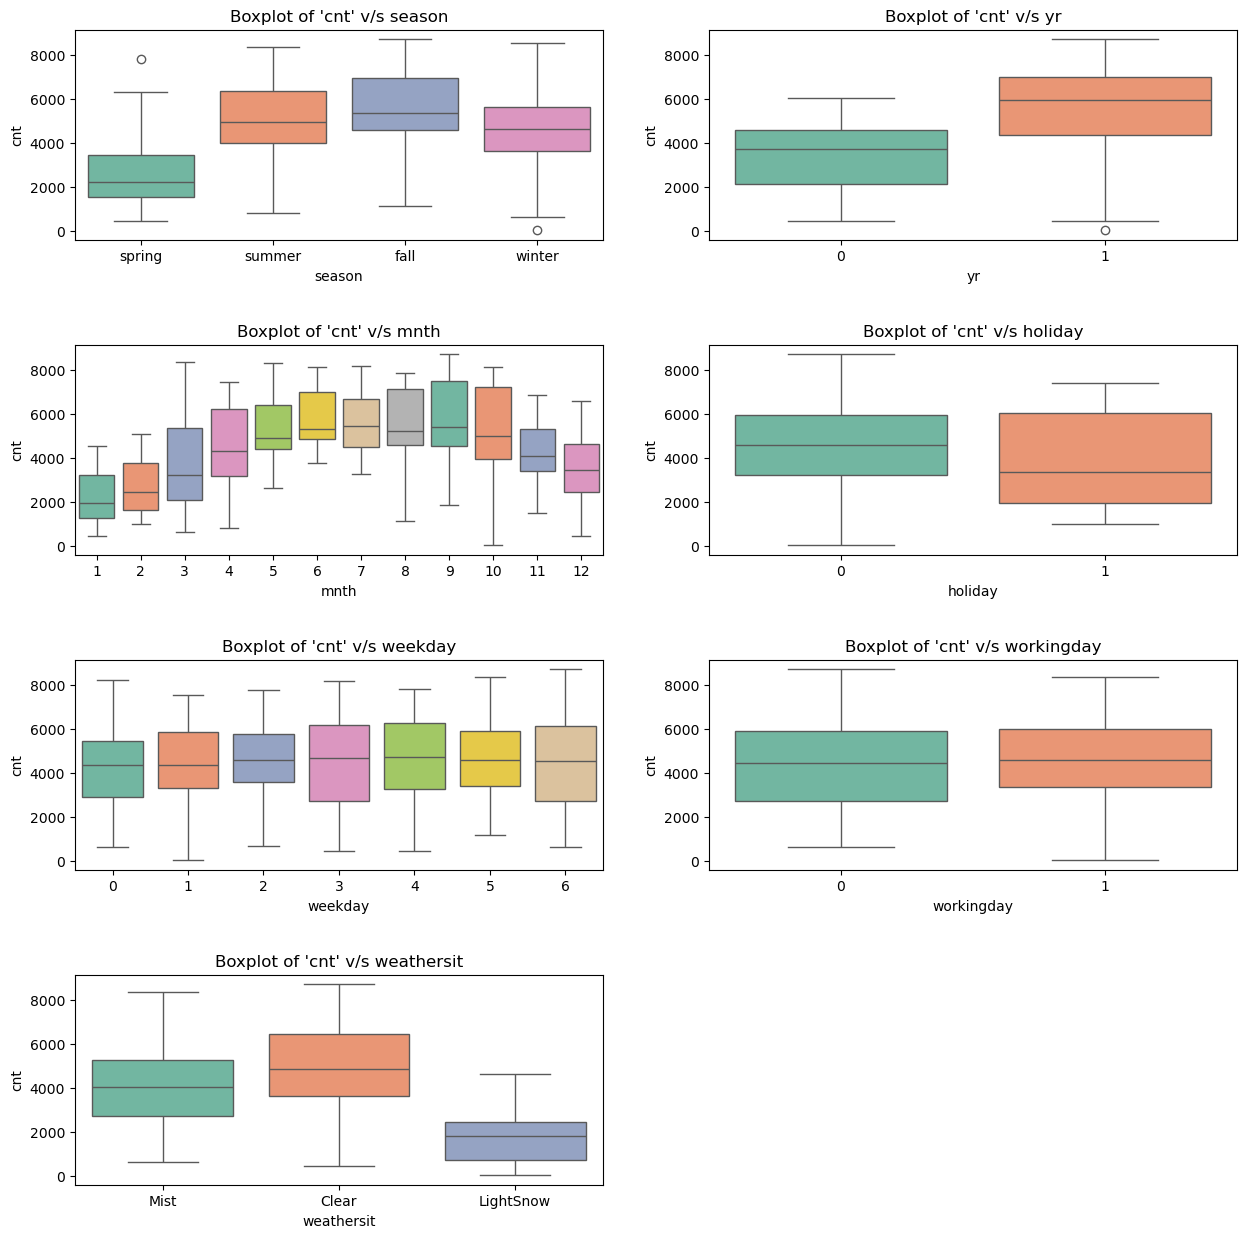

In [31]:
# Boxplots for all categorical variables

plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=.5)
for i, col in enumerate(cat_col):
    plt.subplot(4,2,i+1)
    plt.title(label="Boxplot of 'cnt' v/s " + col)
    sns.boxplot(x=col, y='cnt', data=df_bike, palette="Set2");

`OBSERVATION` - Most of the insights we have derived already. From the above box plot, we could say that holiday, and weekday is not showing any major changes.

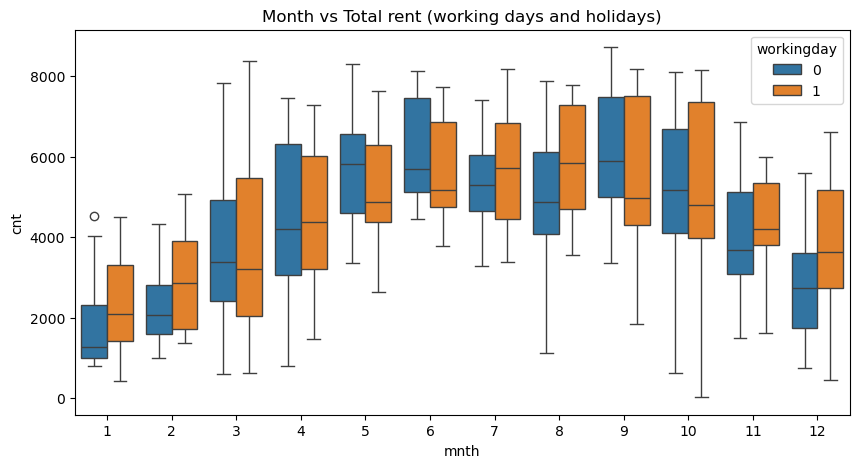

In [32]:
#Box plot for each month against cnt along with Working day

plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'workingday', data = df_bike)
plt.title("Month vs Total rent (working days and holidays)")
plt.show()

`OBSERVATIONS` - Shows upward trend in total bike rent from January to June, followed by a downward trend from July to December. This suggests that bike rentals are higher during the warmer months. Also in most of the months, total rents are high in the working day. During April and May, holiday marks the high rent may be due to holiday season or weather conditions.

### MULTIVARIATE ANALYSIS

<Figure size 640x480 with 0 Axes>

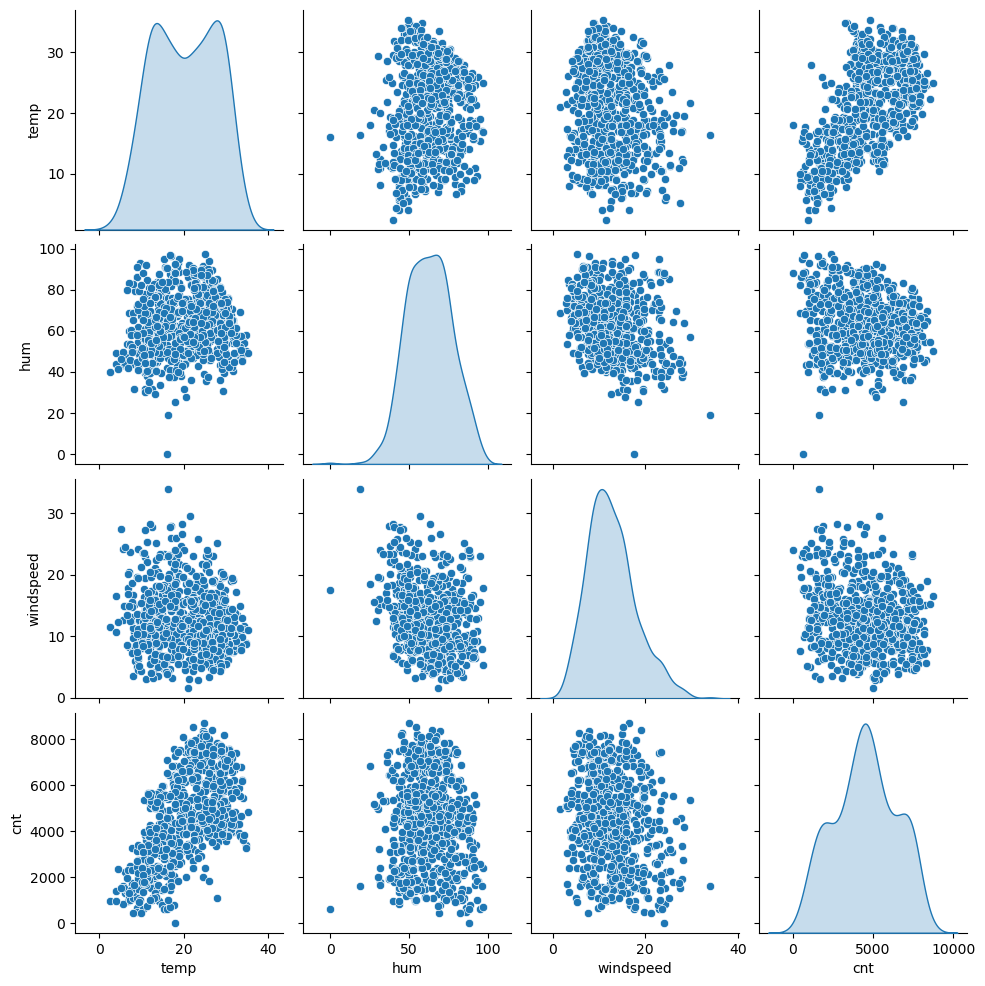

In [33]:
#Multivariate analysis on the numerical columns

fig = plt.figure()
sns.pairplot(df_bike[['temp','hum','windspeed','cnt']], diag_kind='kde')
plt.show()

`OBSERVATIONS`
1. Temperature and total rent have slight linear relationship
2. Pattern of windspeed and humidity againt  the total rent is similar. Concenterated between 50 and 80 of humidity, 5 and 20 of windspeed

From the plot - temperature, humidity, and windspeed can influence bike rentals to some extent

<Figure size 640x480 with 0 Axes>

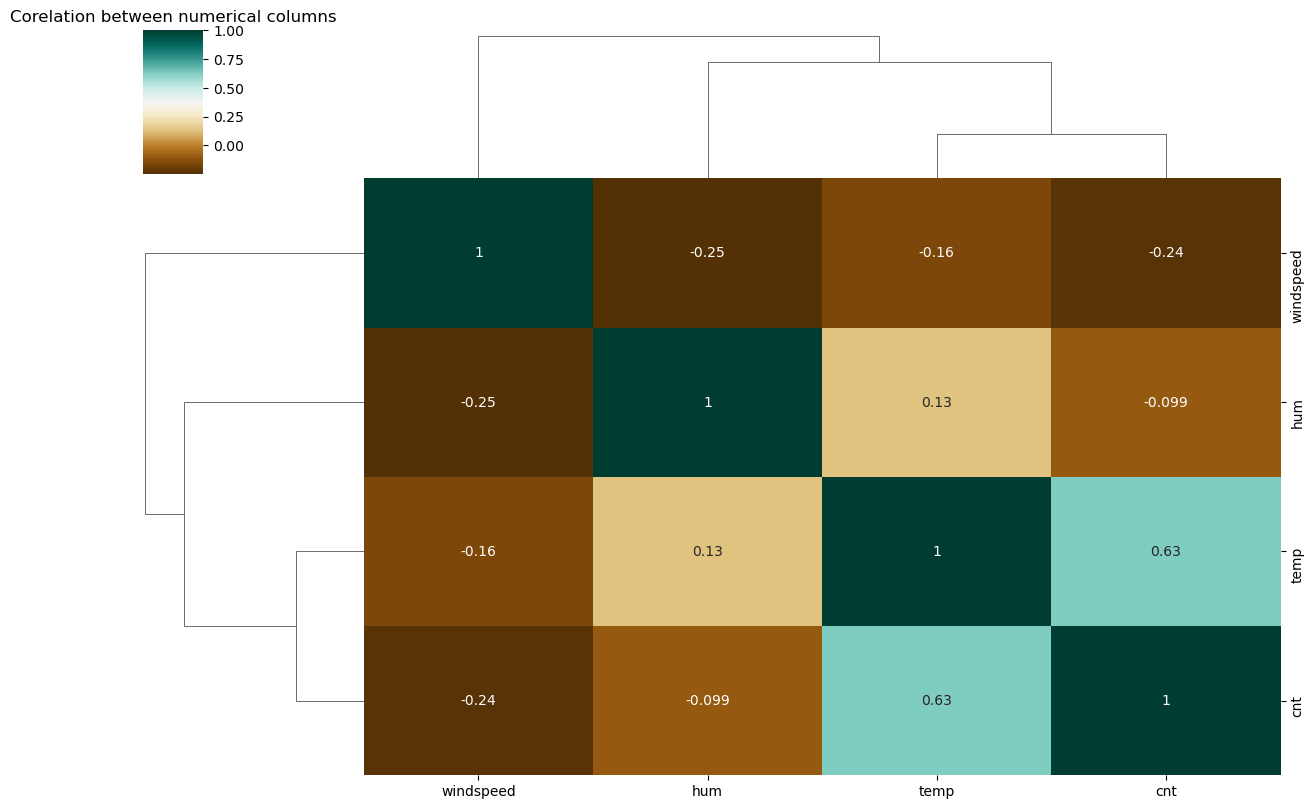

In [34]:
#plotting cluster map for numerical columns

fig = plt.figure()
sns.clustermap(df_bike[['temp','hum','windspeed','cnt']].corr(),annot=True,figsize=(12, 8),cmap="BrBG")
plt.title('Corelation between numerical columns')
plt.show()

`OBSERVATION` - There are negative correlations between cnt with hum and windspeed. We could see the positive relationship between cnt and temp. Similarly humidity has the negative correlation between windspeed

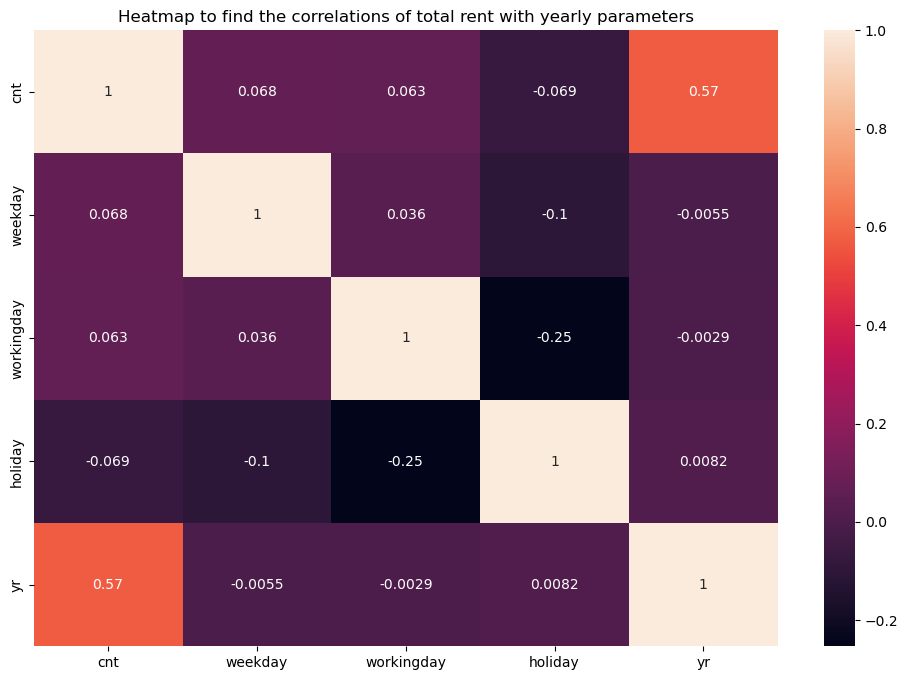

In [36]:
#Heatmap of categorical columns with total rent
plt.figure(figsize=(12,8))
sns.heatmap(df_bike[['cnt','weekday','workingday','holiday','yr']].corr(), annot=True)
plt.title('Heatmap to find the correlations of total rent with yearly parameters')
plt.show()

`OBSERVATION` - The total rent has high correlation with year as we could see year on year it is increasing. But we could no or weak correlation between weekday, workingday and holiday against total rent

#### SUMMARY INSIGHTS
1. The total rent has high correlation with year as we could see year on year it is increasing. But we could no or weak correlation between weekday, workingday and holiday against total rent
2. There are negative correlations between cnt with hum and windspeed.
3. Temperature, humidity, and windspeed can influence bike rentals to some extent
4.  The weather conditions play a significant role in bike rental patterns, with clear weather and warmer temperatures being the most favorable for rentals.
5.  People tend to rent bikes more frequently on working days, possibly for commuting or leisure activities.
6.  Compared to 2018, 2019 has increased in bike rental bookings in all weather conditions. However, total rent is depending on the weather conditions. High marking of total sales in clear weather followed by mist. LightSnow marks the very less total rent.
7.  There is heavy concentration of total rents when the windspeed is lower (7-16). If the windspeed is increasing, the total rent is tend to decrease.

### Data Preprocessing

In [37]:
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,43.6957,12.522300,1600


In [38]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 62.9+ KB


#### Dummy variable creation

In [39]:
#declaring the categorical variables and converting it from 'int' to 'category'

df_bike['season']=df_bike['season'].astype('category')
df_bike['mnth']=df_bike['mnth'].astype('category')
df_bike['weekday']=df_bike['weekday'].astype('category')
df_bike['weathersit']=df_bike['weathersit'].astype('category')
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


In [40]:
df_bike_ver = pd.get_dummies(df_bike, drop_first=True, dtype='int')
df_bike_ver.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_LightSnow,weathersit_Mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [41]:
df_bike_ver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr                    730 non-null    int64  
 1   holiday               730 non-null    int64  
 2   workingday            730 non-null    int64  
 3   temp                  730 non-null    float64
 4   hum                   730 non-null    float64
 5   windspeed             730 non-null    float64
 6   cnt                   730 non-null    int64  
 7   season_spring         730 non-null    int32  
 8   season_summer         730 non-null    int32  
 9   season_winter         730 non-null    int32  
 10  mnth_2                730 non-null    int32  
 11  mnth_3                730 non-null    int32  
 12  mnth_4                730 non-null    int32  
 13  mnth_5                730 non-null    int32  
 14  mnth_6                730 non-null    int32  
 15  mnth_7                7

Now we have converted all columns into numeric.

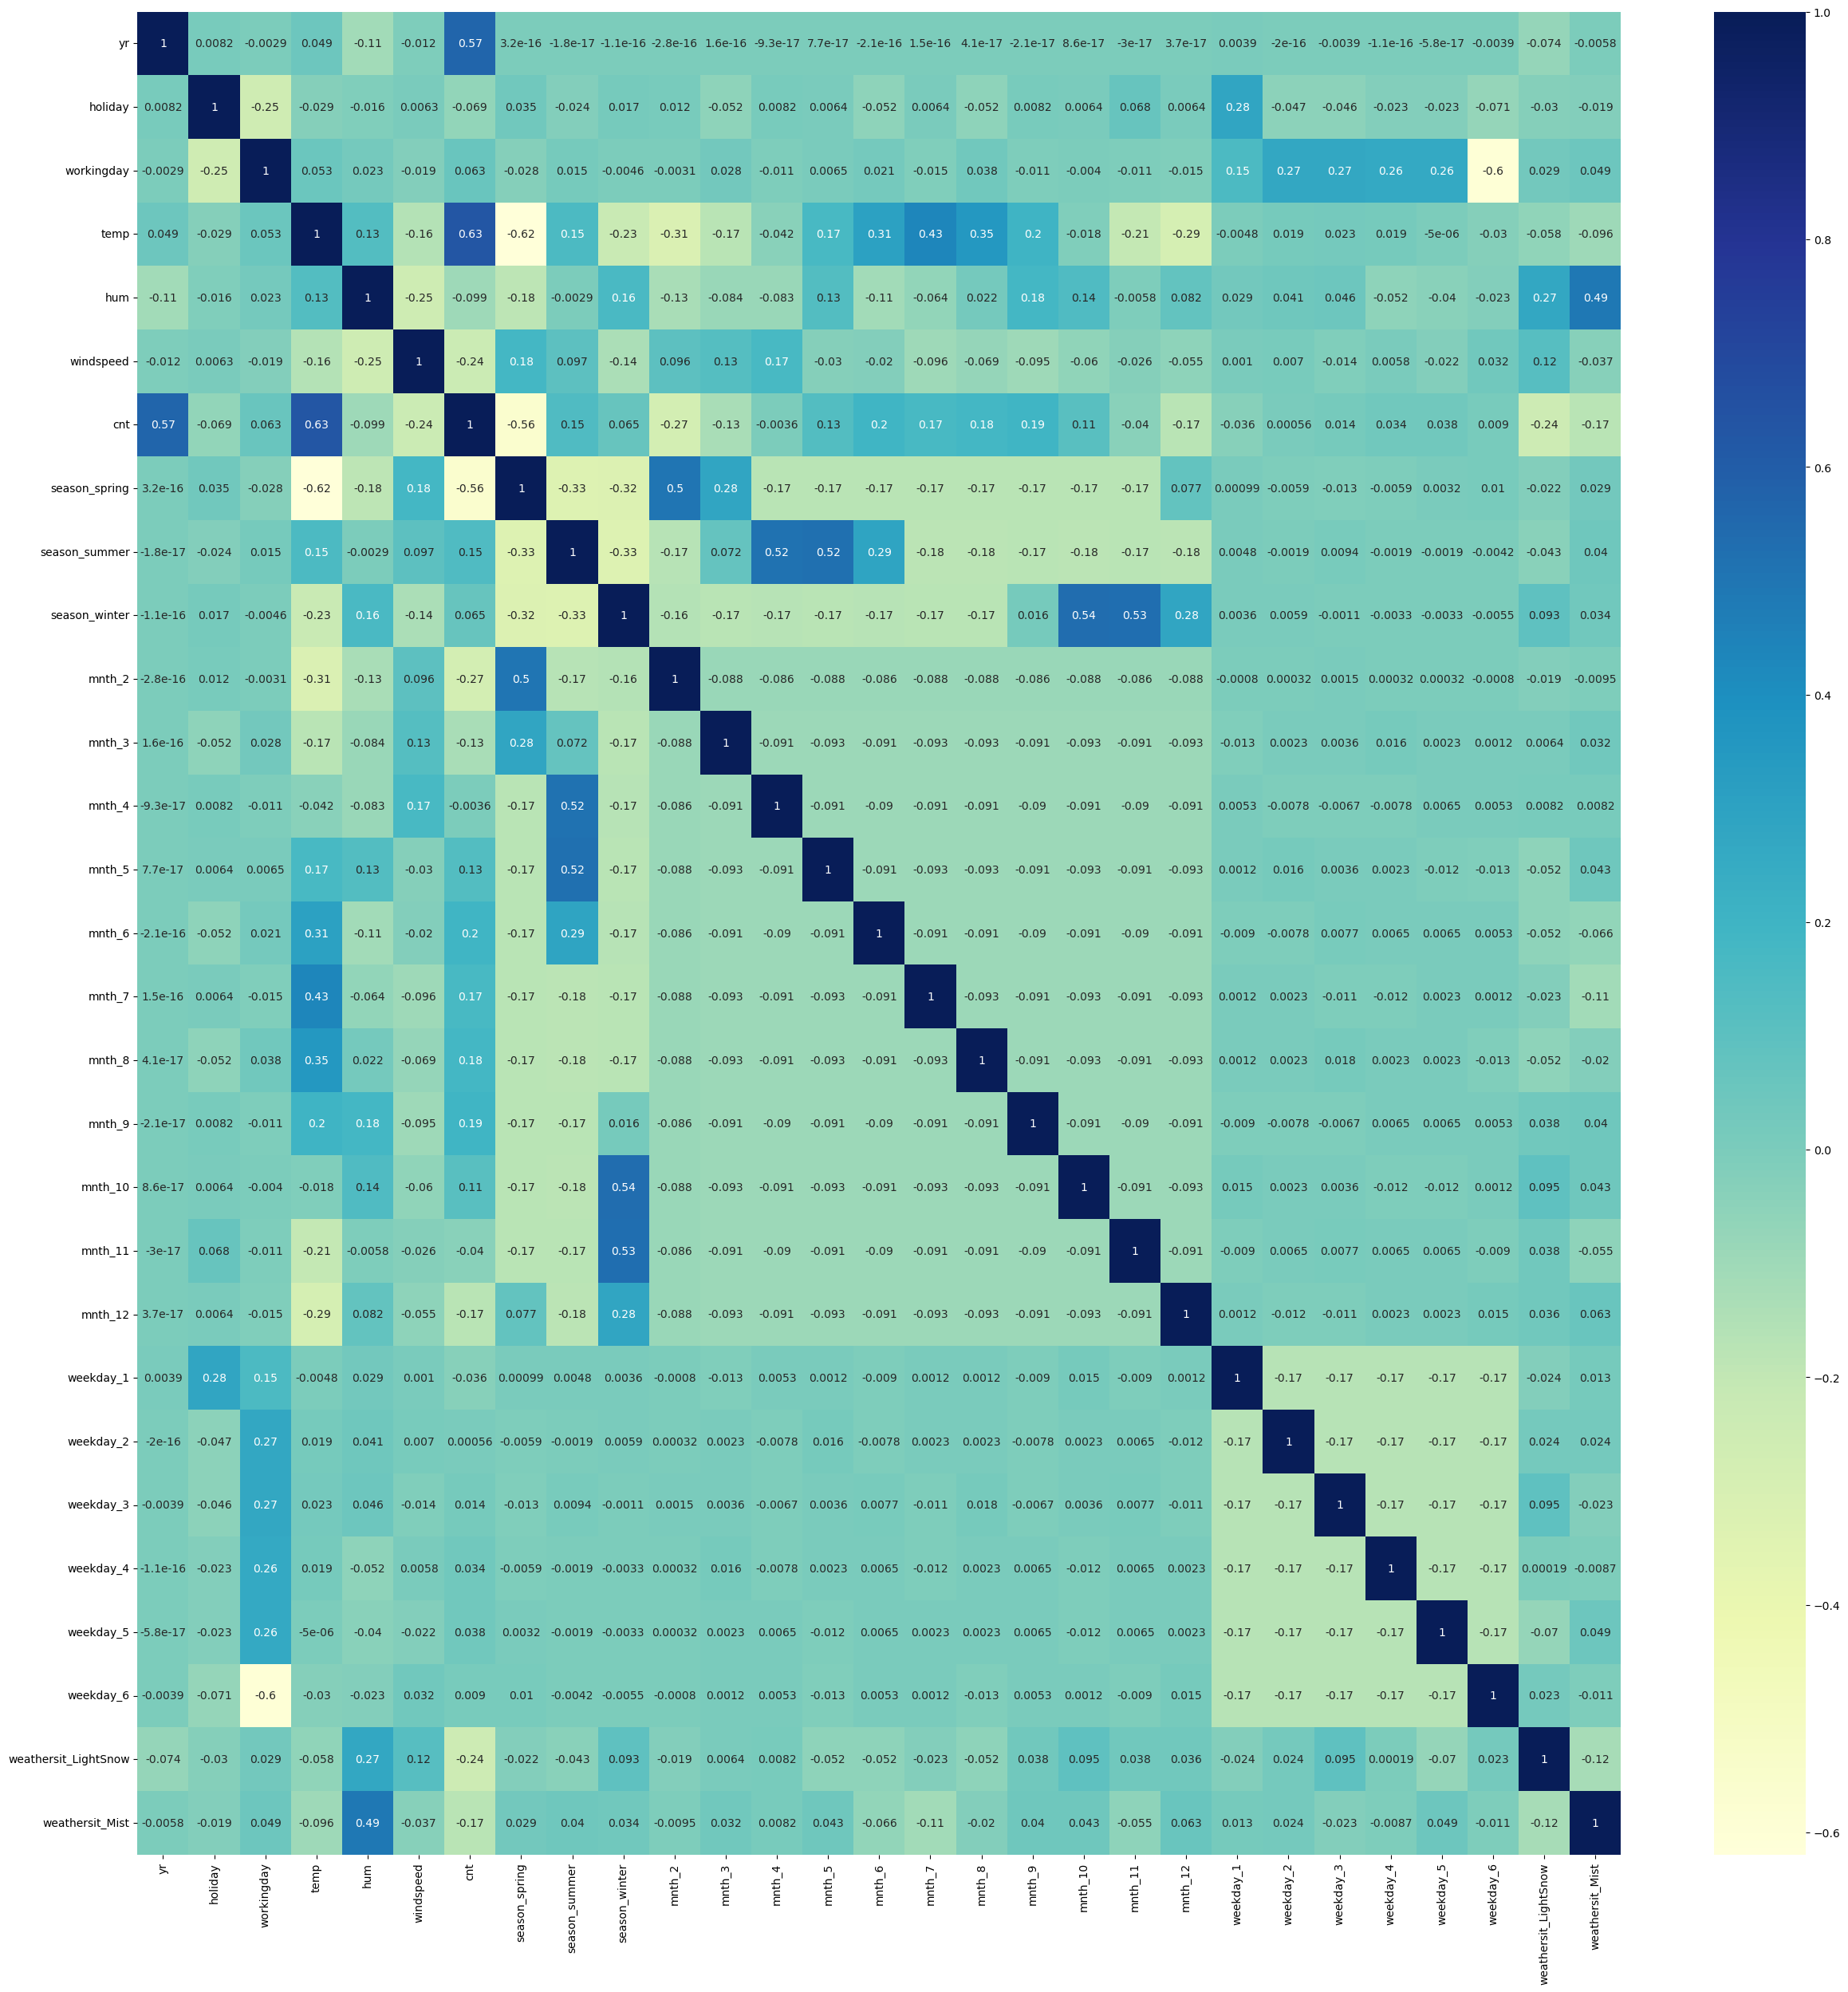

In [42]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 30))
sns.heatmap(df_bike_ver.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [43]:
pd.set_option('display.max_columns', 500)
df_bike_ver.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_LightSnow,weathersit_Mist
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.076712,0.084932,0.082192,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.084932,0.143836,0.142466,0.141096,0.142466,0.142466,0.143836,0.028767,0.336986
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.266317,0.278971,0.274845,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.278971,0.351164,0.349767,0.348359,0.349767,0.349767,0.351164,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
df_bike_ver.shape

(730, 29)

All the above variables are lying in between 0 and 1, except humidty, windspeed, cnt and temperature

### SPLITTING THE DATA (TRAIN AND TEST)

In [45]:
# Set the random seed for reproducibility
np.random.seed(0)

#setting up the random state to 100 to keep the data standard everytime it runs
df_train, df_test = train_test_split(df_bike_ver, train_size=0.7, test_size = 0.3, random_state=100)

#printing the shape
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


### Feature scaling

All the variables are lying in between 0 and 1, except humidty, windspeed, cnt and temperature

In [46]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_LightSnow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.102429,63.112926,12.831318,4486.382353,0.243137,0.245098,0.24902,0.066667,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.029412,0.343137
std,0.500429,0.157763,0.468282,7.431169,14.156632,5.291832,1952.158739,0.429398,0.430568,0.43287,0.249689,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.169124,0.475223
min,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,63.437500,12.083182,4530.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
scale_var = ['temp','hum','windspeed','cnt']

In [48]:
#importing the libraries to apply standard scalar
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

df_train[scale_var] = scaler.fit_transform(df_train[scale_var])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_LightSnow,weathersit_Mist
653,1,0,1,-0.121335,-0.514725,-0.117752,1.562685,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
576,1,0,1,1.231731,0.516433,-0.330615,1.399629,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,-0.420478,-0.069854,-0.385694,-0.215554,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
728,1,0,0,-1.294913,-1.045032,2.018143,-1.379511,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
482,1,0,0,-0.627580,-1.000840,-0.779889,-0.136589,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [49]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_LightSnow,weathersit_Mist
count,510.000000,510.000000,510.000000,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,-2.385891e-16,-3.831358e-16,-2.263984e-16,-5.224579e-17,0.243137,0.245098,0.24902,0.066667,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.029412,0.343137
std,0.500429,0.157763,0.468282,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.429398,0.430568,0.43287,0.249689,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.169124,0.475223
min,0.000000,0.000000,0.000000,-2.381246e+00,-4.462565e+00,-1.890981e+00,-2.289141e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-8.749555e-01,-7.666192e-01,-7.167878e-01,-7.006213e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.443562e-02,2.294988e-02,-1.415145e-01,2.236523e-02,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,8.773604e-01,7.167702e-01,5.522525e-01,7.625291e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,2.050938e+00,2.399023e+00,4.004188e+00,2.167738e+00,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### DIVIDING THE DATASET INTO X (INDEPENDENT) AND Y (DEPENDENT) SETS FOR THE MODEL BUILDING

Splitting the target and predictor variable

In [50]:
y_train = df_train.pop('cnt')
X_train = df_train
print(X_train)

     yr  holiday  workingday      temp       hum  windspeed  season_spring  \
653   1        0           1 -0.121335 -0.514725  -0.117752              0   
576   1        0           1  1.231731  0.516433  -0.330615              0   
426   1        0           0 -0.420478 -0.069854  -0.385694              1   
728   1        0           0 -1.294913 -1.045032   2.018143              1   
482   1        0           0 -0.627580 -1.000840  -0.779889              0   
..   ..      ...         ...       ...       ...        ...            ...   
526   1        0           1  1.273152 -0.305544   0.205320              0   
578   1        0           1  1.448040  0.201190  -0.787759              0   
53    0        0           1 -1.483204 -1.471329  -1.234384              1   
350   0        0           0 -1.281106 -0.497048   0.654645              0   
79    0        0           1 -0.330635  0.751352   1.232757              0   

     season_summer  season_winter  mnth_2  mnth_3  mnth_4  mnth

### Feature Selection

Using RFE (Recursive Feature Elimiation) - an automated approach. Based on the findings, we will manually eliminate the other variables

In [51]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=15)

In [52]:
selector = selector.fit(X_train, y_train)
selector.support_

array([ True,  True,  True,  True, False, False,  True, False,  True,
       False,  True,  True,  True,  True, False,  True,  True, False,
       False, False, False, False, False, False, False,  True,  True,
        True])

In [53]:
selected_features = X_train.columns[selector.support_]
print(selected_features)

Index(['yr', 'holiday', 'workingday', 'temp', 'season_spring', 'season_winter',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9', 'weekday_6',
       'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')


In [54]:
X_train_df=X_train[selected_features]

In [55]:
X_train_df.shape

(510, 15)

### MODEL BUILDING

Since we have applied sklearn linear regression model to select the features. Now we use `stats` modelling to identify the statistical parameters and further drop the variables if not required.

#### Iteration - LR 1

In [56]:
#adding the constant 
X_train_df = sm.add_constant(X_train_df)

#create a first fit model
linearModel_1 = sm.OLS(y_train, X_train_df).fit()

#check the parameters obtained
linearModel_1.params

const                  -0.721776
yr                      1.042180
holiday                -0.232382
workingday              0.205037
temp                    0.444518
season_spring          -0.339366
season_winter           0.471691
mnth_3                  0.229738
mnth_4                  0.235703
mnth_5                  0.371527
mnth_6                  0.249010
mnth_8                  0.217304
mnth_9                  0.501441
weekday_6               0.243316
weathersit_LightSnow   -1.353708
weathersit_Mist        -0.364774
dtype: float64

In [57]:
print(linearModel_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     163.1
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          2.92e-180
Time:                        14:10:35   Log-Likelihood:                -268.81
No. Observations:                 510   AIC:                             569.6
Df Residuals:                     494   BIC:                             637.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.7218 

`OBSERVATION`
- The R-squared value is 83% which is good.
- The adjuster R-squared is also 82% which is also good
- Probability of F-statistics is also nearly 0 which says the model is good
- By looking into the p-value of the co-efficients, `HOLIDAY` is having high p=value

#### Calculating VIF for the same

In [58]:
#calculating VIF
vif = pd.DataFrame()
x = X_train_df
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
0,const,17.86
5,season_spring,4.07
4,temp,3.20
6,season_winter,3.09
3,workingday,1.88
8,mnth_4,1.78
13,weekday_6,1.78
11,mnth_8,1.77
9,mnth_5,1.65
10,mnth_6,1.58


The VIF for all the selected attributes from RFE is below 5. But we have the p-value for holiday is more than 0.05, hence we can drop the holiday column

In [59]:
X_train_df.drop(columns='holiday',inplace = True)
X_train_df.head()

,const,yr,workingday,temp,season_spring,season_winter,mnth_3,mnth_4,mnth_5,mnth_6,mnth_8,mnth_9,weekday_6,weathersit_LightSnow,weathersit_Mist
653,1.0,1,1,-0.121335,0,1,0,0,0,0,0,0,0,0,0
576,1.0,1,1,1.231731,0,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,-0.420478,1,0,1,0,0,0,0,0,1,0,1
728,1.0,1,0,-1.294913,1,0,0,0,0,0,0,0,0,0,0
482,1.0,1,0,-0.627580,0,0,0,1,0,0,0,0,1,0,1


#### Iteration - LR 2

In [60]:
#adding the constant 
X_train_df = sm.add_constant(X_train_df)

#create a first fit model
linearModel_2 = sm.OLS(y_train, X_train_df).fit()

#check the parameters obtained
linearModel_2.params

const                  -0.756165
yr                      1.042967
workingday              0.239098
temp                    0.444763
season_spring          -0.344547
season_winter           0.469003
mnth_3                  0.235614
mnth_4                  0.234949
mnth_5                  0.375178
mnth_6                  0.253624
mnth_8                  0.219577
mnth_9                  0.494346
weekday_6               0.277749
weathersit_LightSnow   -1.349058
weathersit_Mist        -0.362830
dtype: float64

In [61]:
print(linearModel_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     173.7
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.17e-180
Time:                        14:10:44   Log-Likelihood:                -270.55
No. Observations:                 510   AIC:                             571.1
Df Residuals:                     495   BIC:                             634.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.7562 

`OBSERVATION`
- The R-squared and adjusted R-squared shows no significant changes.
- An F-statistic p-value of 1.17e-180 indicates that your model is statistically significant, and you can reject the null hypothesis
- By looking into the p-value of the co-efficients, `mnth_4` is p-value of about 0.011

#### VIF check

In [62]:
#calculating VIF
vif = pd.DataFrame()
x = X_train_df
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
0,const,16.83
4,season_spring,4.06
3,temp,3.20
5,season_winter,3.09
7,mnth_4,1.78
10,mnth_8,1.77
2,workingday,1.66
8,mnth_5,1.65
12,weekday_6,1.64
9,mnth_6,1.58


So far, the model is pretty good. But we can stil remove the month_4 column and check the summary

In [63]:
X_train_df.drop(columns='mnth_4',inplace = True)
X_train_df.head()

,const,yr,workingday,temp,season_spring,season_winter,mnth_3,mnth_5,mnth_6,mnth_8,mnth_9,weekday_6,weathersit_LightSnow,weathersit_Mist
653,1.0,1,1,-0.121335,0,1,0,0,0,0,0,0,0,0
576,1.0,1,1,1.231731,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,-0.420478,1,0,1,0,0,0,0,1,0,1
728,1.0,1,0,-1.294913,1,0,0,0,0,0,0,0,0,0
482,1.0,1,0,-0.627580,0,0,0,0,0,0,0,1,0,1


#### Iteration - LR 3

In [64]:
#adding the constant 
X_train_df = sm.add_constant(X_train_df)

#create a first fit model
linearModel_3 = sm.OLS(y_train, X_train_df).fit()

#check the parameters obtained
linearModel_3.params

const                  -0.651864
yr                      1.050945
workingday              0.238982
temp                    0.416710
season_spring          -0.471436
season_winter           0.354521
mnth_3                  0.193775
mnth_5                  0.281871
mnth_6                  0.175333
mnth_8                  0.144229
mnth_9                  0.431356
weekday_6               0.277131
weathersit_LightSnow   -1.354010
weathersit_Mist        -0.363238
dtype: float64

In [65]:
print(linearModel_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     184.4
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          2.14e-180
Time:                        14:10:49   Log-Likelihood:                -273.90
No. Observations:                 510   AIC:                             575.8
Df Residuals:                     496   BIC:                             635.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.6519 

`OBSERVATIONS`
1. The R-squared and adjusted R-squared shows no significant changes
2. The p-value of mnth_8 is increased to 0.067

#### VIF check

In [66]:
#calculating VIF
vif = pd.DataFrame()
x = X_train_df
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
0,const,11.97
3,temp,2.85
4,season_spring,2.74
5,season_winter,1.99
2,workingday,1.66
11,weekday_6,1.64
9,mnth_8,1.55
8,mnth_6,1.39
7,mnth_5,1.35
10,mnth_9,1.25


#### Iteration - LR 4

In [67]:
X_train_df.drop(columns='mnth_8',inplace = True)
X_train_df.head()

,const,yr,workingday,temp,season_spring,season_winter,mnth_3,mnth_5,mnth_6,mnth_9,weekday_6,weathersit_LightSnow,weathersit_Mist
653,1.0,1,1,-0.121335,0,1,0,0,0,0,0,0,0
576,1.0,1,1,1.231731,0,0,0,0,0,0,0,0,0
426,1.0,1,0,-0.420478,1,0,1,0,0,0,1,0,1
728,1.0,1,0,-1.294913,1,0,0,0,0,0,0,0,0
482,1.0,1,0,-0.627580,0,0,0,0,0,0,1,0,1


In [68]:
#adding the constant 
X_train_df = sm.add_constant(X_train_df)

#create a first fit model
linearModel_4 = sm.OLS(y_train, X_train_df).fit()

#check the parameters obtained
linearModel_4.params

const                  -0.620533
yr                      1.050189
workingday              0.243513
temp                    0.435922
season_spring          -0.482666
season_winter           0.329217
mnth_3                  0.174607
mnth_5                  0.234459
mnth_6                  0.118839
mnth_9                  0.386526
weekday_6               0.282997
weathersit_LightSnow   -1.362076
weathersit_Mist        -0.357715
dtype: float64

In [69]:
print(linearModel_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.6
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          7.93e-181
Time:                        14:10:53   Log-Likelihood:                -275.63
No. Observations:                 510   AIC:                             577.3
Df Residuals:                     497   BIC:                             632.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.6205 

`OBSERVATIONS`
1. The R-squared and adjusted R-squared shows no significant changes
2. The p-value of mnth_6 is increased to 0.128

#### VIF check

In [70]:
#calculating VIF
vif = pd.DataFrame()
x = X_train_df
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
0,const,11.13
4,season_spring,2.72
3,temp,2.53
5,season_winter,1.89
2,workingday,1.65
10,weekday_6,1.64
8,mnth_6,1.21
7,mnth_5,1.20
6,mnth_3,1.15
9,mnth_9,1.12


#### Iteration - LR 5

In [71]:
X_train_df.drop(columns='mnth_6',inplace = True)
X_train_df.head()

,const,yr,workingday,temp,season_spring,season_winter,mnth_3,mnth_5,mnth_9,weekday_6,weathersit_LightSnow,weathersit_Mist
653,1.0,1,1,-0.121335,0,1,0,0,0,0,0,0
576,1.0,1,1,1.231731,0,0,0,0,0,0,0,0
426,1.0,1,0,-0.420478,1,0,1,0,0,1,0,1
728,1.0,1,0,-1.294913,1,0,0,0,0,0,0,0
482,1.0,1,0,-0.627580,0,0,0,0,0,1,0,1


In [72]:
#adding the constant 
X_train_df = sm.add_constant(X_train_df)

#create a first fit model
linearModel_5 = sm.OLS(y_train, X_train_df).fit()

#check the parameters obtained
linearModel_5.params


const                  -0.599043
yr                      1.048248
workingday              0.243516
temp                    0.443025
season_spring          -0.492093
season_winter           0.314470
mnth_3                  0.165208
mnth_5                  0.211664
mnth_9                  0.365822
weekday_6               0.283754
weathersit_LightSnow   -1.368465
weathersit_Mist        -0.360948
dtype: float64

In [73]:
print(linearModel_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.9
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.67e-181
Time:                        14:10:57   Log-Likelihood:                -276.83
No. Observations:                 510   AIC:                             577.7
Df Residuals:                     498   BIC:                             628.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5990 

`OBSERVATIONS`
1. The R-squared and adjusted R-squared shows no significant changes
2. The p-value omnth_3_8 is increaseto .01467

#### VIF check

In [74]:
#calculating VIF
vif = pd.DataFrame()
x = X_train_df
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
0,const,10.56
4,season_spring,2.70
3,temp,2.47
5,season_winter,1.84
2,workingday,1.65
9,weekday_6,1.64
7,mnth_5,1.15
6,mnth_3,1.14
8,mnth_9,1.08
11,weathersit_Mist,1.05


#### Iteration - LR 6

In [75]:
X_train_df.drop(columns='mnth_3',inplace = True)
X_train_df.head()

,const,yr,workingday,temp,season_spring,season_winter,mnth_5,mnth_9,weekday_6,weathersit_LightSnow,weathersit_Mist
653,1.0,1,1,-0.121335,0,1,0,0,0,0,0
576,1.0,1,1,1.231731,0,0,0,0,0,0,0
426,1.0,1,0,-0.420478,1,0,0,0,1,0,1
728,1.0,1,0,-1.294913,1,0,0,0,0,0,0
482,1.0,1,0,-0.627580,0,0,0,0,1,0,1


In [76]:
#adding the constant 
X_train_df = sm.add_constant(X_train_df)

#create a first fit model
linearModel_6 = sm.OLS(y_train, X_train_df).fit()

#check the parameters obtained
linearModel_6.params

const                  -0.587647
yr                      1.048909
workingday              0.251410
temp                    0.438503
season_spring          -0.472735
season_winter           0.294613
mnth_5                  0.195345
mnth_9                  0.354183
weekday_6               0.291723
weathersit_LightSnow   -1.356813
weathersit_Mist        -0.360664
dtype: float64

In [77]:
print(linearModel_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.4
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          2.18e-181
Time:                        14:11:00   Log-Likelihood:                -279.93
No. Observations:                 510   AIC:                             581.9
Df Residuals:                     499   BIC:                             628.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5876 

`OBSERVATIONS`
1. The R-squared and adjusted R-squared shows no significant changes
2. The p-value for all the co-efficients are fall below 0.05.
3. An F-statistic p-value of 2.18e-181 indicates that the model is statistically significant, and can reject the null hypothesis

#### VIF check

In [78]:
#calculating VIF
vif = pd.DataFrame()
x = X_train_df
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
0,const,10.49
4,season_spring,2.67
3,temp,2.46
5,season_winter,1.80
2,workingday,1.64
8,weekday_6,1.63
6,mnth_5,1.14
7,mnth_9,1.08
10,weathersit_Mist,1.05
9,weathersit_LightSnow,1.04


***FINALIZING THIS MODEL AS THE BEST ONE***

### RESIDUAL ANALYSIS (TRAIN DATA)

We will check the error terms are normally distributed which is one of the assumptions of linear regression.

In [79]:
#predicting the cnt using our finalized model
y_train_cnt = linearModel_6.predict(X_train_df)

In [80]:
#getting the residuals
residuals = y_train - y_train_cnt

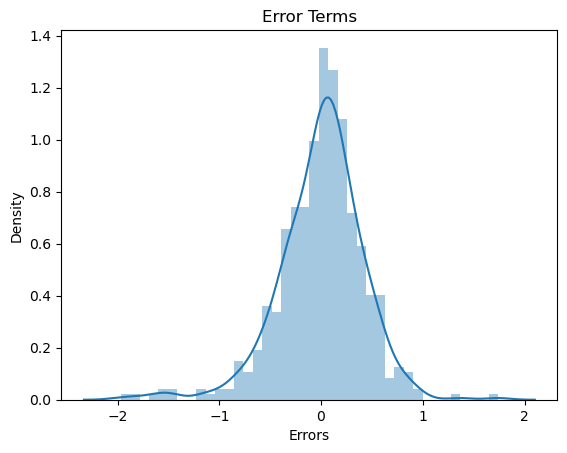

In [81]:
#plotting in the histogram to assert the assumption
sns.distplot(residuals, bins=40)
plt.title("Error Terms")
plt.xlabel("Errors")
plt.show()

`OBSERVATION`

As per our assumptions, the error terms are normally distributed with mean 0 which results in our model is good to go for predictions

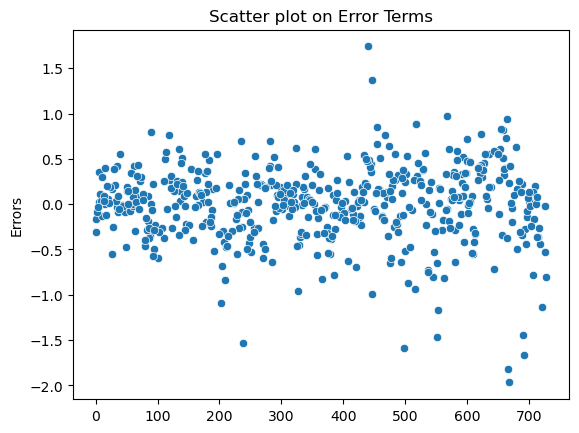

In [82]:
#plotting in the scatterplot to assert the assumption of error term should have homoscedasticity
sns.scatterplot(residuals)
plt.title("Scatter plot on Error Terms")
plt.ylabel("Errors")
plt.show()

As the error doesn't follow any pattern, we can say the errors are independent to each other and it follows homoscedasticity

#### PREDICTION USING FINAL MODEL

In [83]:
#scaling the test data
df_test[scale_var] = scaler.transform(df_test[scale_var])

In [84]:
#splitting the data into target and predictor
y_test = df_test.pop('cnt')
X_test = df_test

In [85]:
# Adding a constant variable 
X_test = sm.add_constant(X_test)

#Creating a dataframe with the columns which are finalized in the latest model
X_test_pd = X_test[X_train_df.columns]

In [86]:
#Making predictions
y_pred_lr6 = linearModel_6.predict(X_test_pd)

#### MODEL EVALUATION

In [87]:
#finding r2_score
r2_score(y_true=y_test, y_pred=y_pred_lr6)

0.8105429849199794

About 81% of the variance in the 'cnt' variable can be explained by the other independent variables in our model. <br>
The r2_score suggest a strong model fit

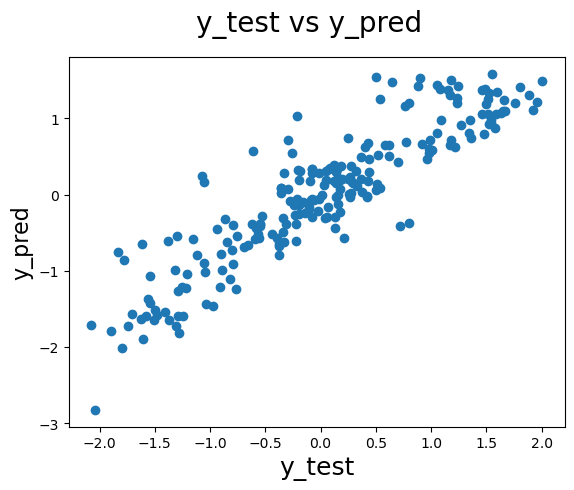

In [88]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_lr6)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

We can see that the equation of our best fitted line is:

$ cnt = -0.5876 + 1.0489  \times  yr + 0.2514  \times  workingday + 0.4385 \times temp - 0.4727 \times seasonspring + 0.2946 \times seasonwinter +  0.1953 \times mnth5 + 0.3542 \times mnth9 + 0.2917 \times weekday6 - 1.3568 \times weathersitLightSnow - 0.3607 \times weathersitMist $